# Final Project

For the following project, you will be working with a movie dataset. The dataset is [here](https://drive.google.com/file/d/1R53inu8Jcb9GGoyiuVnBMVnO7XvCaJAE/view?usp=drive_link). The dataset columns are as follows:

* Title: The movie's title
* Genre: The movie's genre
* Stars: The number of famous actors in the movie
* Runtime: The length of the movie's runtime
* Budget: How much was spent on filming the movie (in millions)
* Promo: How much money was spent promoting the movie (in millions)
* Season: The season in which the movie was released
* Rating: The movie's rating
* R1: Reviewer 1's review
* R1: Reviewer 2's review
* R1: Reviewer 3's review

And the target variable:

* Success: Whether the film was a success or a flop

Fill in the answers to questions in the text field, and show your code below.

In [ ]:
import pandas as pd
from scipy import stats
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data loading

Load the data

In [ ]:
df = pd.read_csv('CMSC320FinalProjectData.csv')
df

,Unnamed: 0,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success
0,0,"""Love in the Inbox""",126,1,2020,6.679387e+07,73.543754,Winter,PG,Romantic Comedy,"""An unconvincing portrayal of suspense that fa...","""An uninspired plotline that lacks coherence a...","""A visually captivating masterpiece that mesme...",False
1,1,"""Coffee Shop Serendipity""",131,0,2020,4.667863e+01,33.572003,Fall,PG,Romantic Comedy,"""A movie that feels disjointed and fails to co...","""An attempt at humor that lacks cleverness and...","""A timeless classic that continues to enchant ...",False
2,2,"""The Wedding Date Dilemma""",132,4,2000,3.639134e+01,54.561523,Summer,PG,Romantic Comedy,"""An underwhelming cinematic effort with unconv...","""An emotionally resonant movie that connects u...","""A cinematic triumph that surpasses boundaries...",False
3,3,"""Heartstrings and Highways""",132,1,2015,9.324732e+01,59.714535,Winter,PG13,Romantic Comedy,"""A film that fails to resonate due to its lack...","""A beautifully crafted narrative that unfolds ...","""An uninspired portrayal of drama that feels s...",False
4,4,"""Falling for Cupid""",119,1,2015,9.213021e+01,67.643810,Fall,PG13,Romantic Comedy,"""A movie that struggles to evoke any genuine e...","""A testament to the power of storytelling, lea...","""An uplifting film that leaves a profound impa...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,535,"""Shadow Strike""",128,3,2021,6.489702e+01,91.445593,Fall,PG,Action,"""Weak and contrived dialogue that lacks authen...","""An overemphasis on spectacle over substance t...","""Unremarkable cinematography that fails to cre...",False
536,536,"""Riot Protocol""",123,1,2018,3.098935e+01,46.045408,Summer,R,Action,"""A film that lingers in the memory.""","""A celebration of life and its intricacies.""","""A cinematic tour de force that enchants.""",True
537,537,"""Deadlock Vendetta""",121,1,2003,4.857255e+01,63.660912,Summer,PG,Action,"""A lack of cohesion in the storytelling that m...","""An overly convoluted plot that confuses rathe...","""Flat and unconvincing performances that fail ...",False
538,538,"""Blade Runner Protocol""",124,1,2007,1.364682e+02,188.513344,Summer,R,Action,"""An evocative journey that captivates the soul.""","""An absence of emotional depth, resulting in a...","""A triumph in storytelling and authenticity.""",True


# Data Cleaning

List the three biggest data errors below, with a summary of how you fixed them and why you choose that method:


*
*
*

In [ ]:
print(df['Stars'].value_counts())
df[df['Stars'] == 100]

1      196
0      132
3      125
2       54
4       25
5        6
100      2
Name: Stars, dtype: int64


,Unnamed: 0,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success
22,22,"""Cupid's Chaotic Comedy""",136,100,2010,61.969754,32.502884,Spring,R,Romantic Comedy,"""An unconvincing portrayal of suspense that fa...","""A lackluster attempt at storytelling with sha...","""An uninspired movie that fails to connect wit...",False
47,47,"""The Love Auction""",117,100,2012,59.801772,32.294517,Fall,R,Romantic Comedy,"""An unconvincing attempt at storytelling with ...","""A lackluster cinematic endeavor that fails to...","""An attempt at drama that lacks emotional reso...",False


There are two outliers of 100 stars. This seems unlikely given that all other movies are from 0-5. As such, I will change the 100 to the max of all other movies, which is 5. That way they will still have a high amount of stars (as likely intended by the 100) but not an outlier that could break analysis.

In [ ]:
df['Stars'] = df['Stars'].replace(100, 5)

In [ ]:
df['Success'].value_counts()

False    422
True     118
Name: Success, dtype: int64

Some movies have a runtime of 0. I'm going to change that to the median of the remaining values because it is an integer measure of central tendency and it's not unreasonable to guess that this would be similar to the movies' real runtime.

In [ ]:
median = (df[df['Runtime'] != 0])['Runtime'].median()
df['Runtime'] = df['Runtime'].replace(0, int(median))
df['Runtime'].value_counts()

130    46
133    35
132    34
128    31
136    26
131    26
126    24
127    22
129    21
135    21
124    21
137    21
123    20
134    18
125    17
139    13
122    13
121    13
138    13
142    12
140    11
118    11
120    11
141    11
117     7
143     6
119     5
144     4
114     4
113     3
145     3
116     3
112     3
146     2
115     2
149     2
148     1
111     1
155     1
109     1
147     1
Name: Runtime, dtype: int64

In [ ]:
print(df['Title'].value_counts())
df[df['Title'] == '"Whispers of Redemption"']

"Whispers of Redemption"            4
"Shadow Strike"                     4
"Fading Memories"                   4
"Aurora's Legacy"                   4
"Echoes of Tomorrow"                4
                                   ..
"Final Strike"                      1
"Thunderbolt Fury"                  1
"Code of Honor: Dark Redemption"    1
"Warrior's Vow"                     1
"Thunderstorm Showdown"             1
Name: Title, Length: 460, dtype: int64


,Unnamed: 0,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success
375,375,"""Whispers of Redemption""",118,0,2008,71.471115,45.002854,Spring,R,Drama,"""Unconvincing performances that lack emotional...","""An unsatisfying resolution that fails to prov...","""A testament to the power of cinema, leaving a...",False
396,396,"""Whispers of Redemption""",126,4,2023,78.507208,110.420706,Spring,PG13,Drama,"""Inconsistent character behavior that feels di...","""A heartwarming tale that celebrates the beaut...","""An exhilarating ride that combines suspense, ...",False
403,403,"""Whispers of Redemption""",132,0,2018,105.066217,155.578533,Fall,R,Drama,"""An absence of emotional depth that leaves the...","""Inconsistent pacing that disrupts the film's ...","""A cinematic triumph that transcends boundarie...",False
427,427,"""Whispers of Redemption""",130,3,2013,128.105034,179.929443,Summer,R,Drama,"""A film that transcends time, remaining releva...","""An absence of character growth that leaves th...","""An immersive narrative that captivates with i...",True


What if the duplicate movies are sequels or remakes? Even if this is the case, the difference in other categories (not title) would be enough to differentiate them for any feature exploration or machine learning. As such, I will leave it as is.

114    1.608416e+08
503    1.488257e+08
97     1.452084e+08
180    1.204975e+08
472    1.104071e+08
           ...     
232    2.581984e+01
505    2.438708e+01
217    2.424180e+01
229    2.353257e+01
412    2.175032e+01
Name: Budget, Length: 540, dtype: float64


<Axes: >

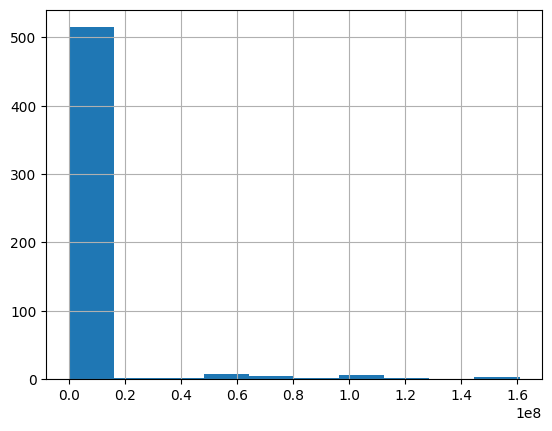

In [ ]:
print(df['Budget'].sort_values(ascending=False))
df['Budget'].hist()

Looks like there are some outliers. I think that the super high numbers are in dollars, not millions of dollars. To fix this I will divide anything > 1,000,000 by 1,000,000.

In [ ]:
def budgetDivide(budget):
  if budget > 1000000:
    return budget/1000000
  else:
    return budget

In [ ]:
df['Budget'] = df['Budget'].apply(budgetDivide)

# Data Exploration





Does Season have a stastically significant impact on a movie's success?

**p-value:**

In [ ]:
cTable = pd.crosstab(df["Season"], df["Success"])
print(cTable)
chi2, p, dof, expected = stats.chi2_contingency(cTable)
print("p-value: ", p)

Success  False  True 
Season               
Fall        90     23
Spring      88     10
Summer     149     58
Winter      95     27
p-value:  0.005716268505111858


Due to the low p value we can reject the null hypopthesis and say that the seasons and success are significantly dependent.

Do seasons have a statistically significant difference in their distribution of content ratings?

**p-value:**

In [ ]:
cTable = pd.crosstab(df["Season"], df["Rating"])
print(cTable)
chi2, p, dof, expected = stats.chi2_contingency(cTable)
print("p-value: ", p)

Rating  PG  PG13   R
Season              
Fall    42    38  33
Spring  33    35  30
Summer  64    71  72
Winter  55    39  28
p-value:  0.21507814500508263


Here, the high p-value indicates that we fail to reject the null hypothesis. We can't say there is a statistically significant difference in ratings between seasons.

Who is the harshest critic (highest precent of negative reviews)?

**Critic:**

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the sentiment as 'positive', 'negative', or 'neutral'
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

In [ ]:
r1sent = df['R1'].apply(get_sentiment).value_counts()
print("Reviewer 1: " + str(r1sent['negative']/r1sent.sum()))
r2sent = df['R2'].apply(get_sentiment).value_counts()
print("Reviewer 2: " + str(r2sent['negative']/r2sent.sum()))
r3sent = df['R3'].apply(get_sentiment).value_counts()
print("Reviewer 1: " + str(r3sent['negative']/r3sent.sum()))

Reviewer 1: 0.5481481481481482
Reviewer 2: 0.4351851851851852
Reviewer 1: 0.35185185185185186


The highest negative percentage comes from reviewer 1, meaning they're the harshest critic.

What is the covariance between promotional budget and the filming budget?

**Cov:**

In [ ]:
print(df['Budget'].cov(df['Promo']))

1907.0543228223628


# Data Visualization

Create a chart that compares the distribution of the budget for each different number of stars. (It does not need to be particularly appealing.

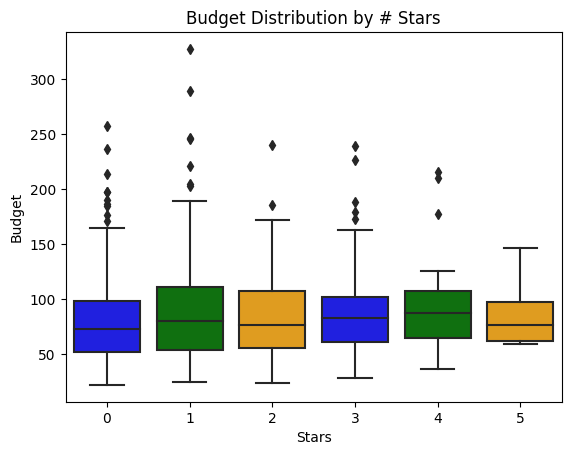

In [ ]:
sns.boxplot(x='Stars', y='Budget', data=df, palette=['blue', 'green', 'orange'])
plt.xlabel('Stars')
plt.ylabel('Budget')
plt.title('Budget Distribution by # Stars')
plt.show()

Create a graph showing the average movie budget over time.

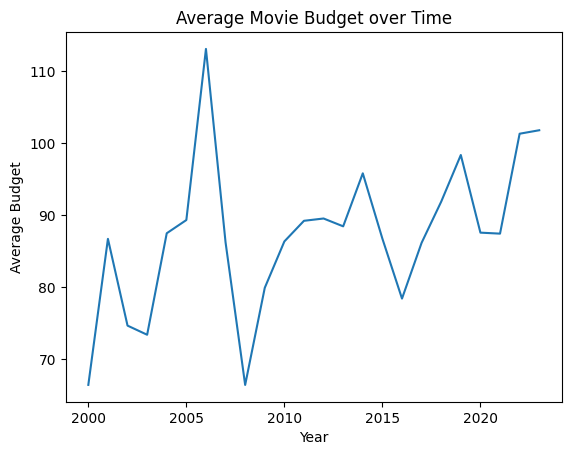

In [ ]:
df.groupby('Year')['Budget'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Average Budget')
plt.title('Average Movie Budget over Time')
plt.show()

# Feature Engineering

List any features you choose to create (if you are creating many features based on one column, you do not need to list them separately.) You are not required to create any features if you do not wish to. You may create any number of additional features.


*
*

I changed the ratings to their sentiment analysis score according to the sentiment analysis textblob tool. I also used one-hot encoding for the categorical features, numbers for the ordinal features, and 0/1 for success/failure.

In [ ]:
def get_sentiment_number(text):
    analysis = TextBlob(text)
    # Classify the sentiment as 'positive', 'negative', or 'neutral'
    return analysis.sentiment.polarity

In [ ]:
df_feat = df.copy()
df_feat['R1'] = df_feat['R1'].apply(get_sentiment_number)
df_feat['R2'] = df_feat['R2'].apply(get_sentiment_number)
df_feat['R3'] = df_feat['R3'].apply(get_sentiment_number)


In [ ]:
df_feat

,Unnamed: 0,Title,Runtime,Stars,Year,Budget,Promo,Season,Rating,Genre,R1,R2,R3,Success
0,0,"""Love in the Inbox""",126,1,2020,66.793869,73.543754,Winter,PG,Romantic Comedy,-0.500000,-0.500000,0.500000,False
1,1,"""Coffee Shop Serendipity""",131,0,2020,46.678633,33.572003,Fall,PG,Romantic Comedy,-0.500000,-0.025000,0.166667,False
2,2,"""The Wedding Date Dilemma""",132,4,2000,36.391338,54.561523,Summer,PG,Romantic Comedy,0.000000,0.000000,0.000000,False
3,3,"""Heartstrings and Highways""",132,1,2015,93.247317,59.714535,Winter,PG13,Romantic Comedy,-0.312500,0.850000,-0.262500,False
4,4,"""Falling for Cupid""",119,1,2015,92.130207,67.643810,Fall,PG13,Romantic Comedy,0.200000,0.227273,0.083333,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,535,"""Shadow Strike""",128,3,2021,64.897017,91.445593,Fall,PG,Action,-0.458333,0.000000,0.000000,False
536,536,"""Riot Protocol""",123,1,2018,30.989354,46.045408,Summer,R,Action,0.000000,0.000000,0.000000,True
537,537,"""Deadlock Vendetta""",121,1,2003,48.572549,63.660912,Summer,PG,Action,0.000000,0.000000,-0.262500,False
538,538,"""Blade Runner Protocol""",124,1,2007,136.468170,188.513344,Summer,R,Action,0.000000,-0.111458,0.000000,True


In [ ]:
df_feat = df_feat.join(pd.get_dummies(df_feat['Season'], prefix='Season')).join(pd.get_dummies(df_feat['Genre'], prefix='Genre'))
df_feat['Rating'] = df_feat['Rating'].map({'PG': 1, 'PG13': 2, 'R': 3})
df_feat['Success'] = df_feat['Success'].map({True: 1, False: 0})
df_feat = df_feat.drop('Season', axis=1).drop('Genre', axis=1).drop('Title', axis=1)

In [ ]:
df_feat

,Unnamed: 0,Runtime,Stars,Year,Budget,Promo,Rating,R1,R2,R3,Success,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Genre_Action,Genre_Drama,Genre_Fantasy,Genre_Romantic Comedy,Genre_Science fiction
0,0,126,1,2020,66.793869,73.543754,1,-0.500000,-0.500000,0.500000,0,0,0,0,1,0,0,0,1,0
1,1,131,0,2020,46.678633,33.572003,1,-0.500000,-0.025000,0.166667,0,1,0,0,0,0,0,0,1,0
2,2,132,4,2000,36.391338,54.561523,1,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0,1,0
3,3,132,1,2015,93.247317,59.714535,2,-0.312500,0.850000,-0.262500,0,0,0,0,1,0,0,0,1,0
4,4,119,1,2015,92.130207,67.643810,2,0.200000,0.227273,0.083333,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,535,128,3,2021,64.897017,91.445593,1,-0.458333,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0
536,536,123,1,2018,30.989354,46.045408,3,0.000000,0.000000,0.000000,1,0,0,1,0,1,0,0,0,0
537,537,121,1,2003,48.572549,63.660912,1,0.000000,0.000000,-0.262500,0,0,0,1,0,1,0,0,0,0
538,538,124,1,2007,136.468170,188.513344,3,0.000000,-0.111458,0.000000,1,0,0,1,0,1,0,0,0,0


# Modeling

Create a model of your choice.

**Model type choosen:** Random Forest

In [ ]:
forest = RandomForestClassifier(random_state=0, class_weight='balanced')

# Testing

Shuffle your data and break it into a 10% test set and 90% training set. Show your model's accuracy on the test set. In order to get full credit, the model's accuracy must be higher than 50%.

**Model accuracy:**

In [ ]:
X = df_feat.loc[:, ~df_feat.columns.isin(["Success", "Unnamed: 0"])]
y = df_feat['Success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
forest.fit(X_train, y_train)
pred = forest.predict(X_train)
print("Train Accuracy:", metrics.accuracy_score(y_train, pred))
predTest = forest.predict(X_test)
print("Test Accuracy:",metrics.accuracy_score(y_test, predTest))

Train Accuracy: 1.0
Test Accuracy: 0.7777777777777778


Show the confusion matrix for your model. To get full credit, your false positive rate and false negative rate must be under 30%.


**False negative rate:**

**False positive rate:**

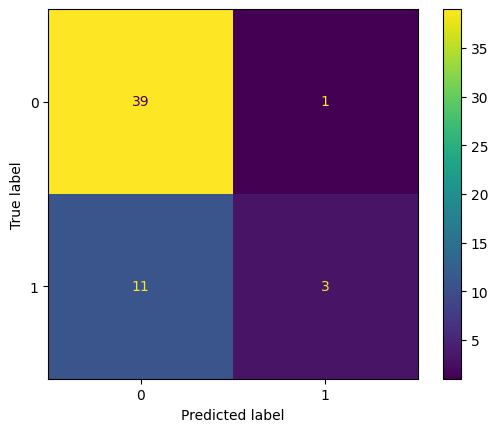

In [ ]:
cm = confusion_matrix(y_test, predTest, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot()
plt.show()

In [ ]:
print("fp rate = " + str(1/(39+1+11+3)))
print("fn rate = " + str(11/(39+1+11+3)))

fp rate = 0.018518518518518517
fn rate = 0.2037037037037037


What was the most important feature for your model? Don't guess, either look up how to check or do your own tests.

**Most important feature:** Rating 1's positivity score.


In [ ]:
feature_importances = forest.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
6,R1,0.221566
4,Promo,0.114179
3,Budget,0.105688
1,Stars,0.099536
0,Runtime,0.097653
7,R2,0.081377
2,Year,0.075354
8,R3,0.055092
5,Rating,0.031774
13,Genre_Action,0.027610
